In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


### **Initial Data-Exploration**

In [123]:
data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv'
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [53]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['duration']

0        -45.600000
1        -63.433333
2         53.650000
3         56.866667
4         18.833333
            ...    
174995   -28.583333
174996    61.400000
174997    70.033333
174998   -38.366667
174999    87.983333
Name: duration, Length: 175000, dtype: float64

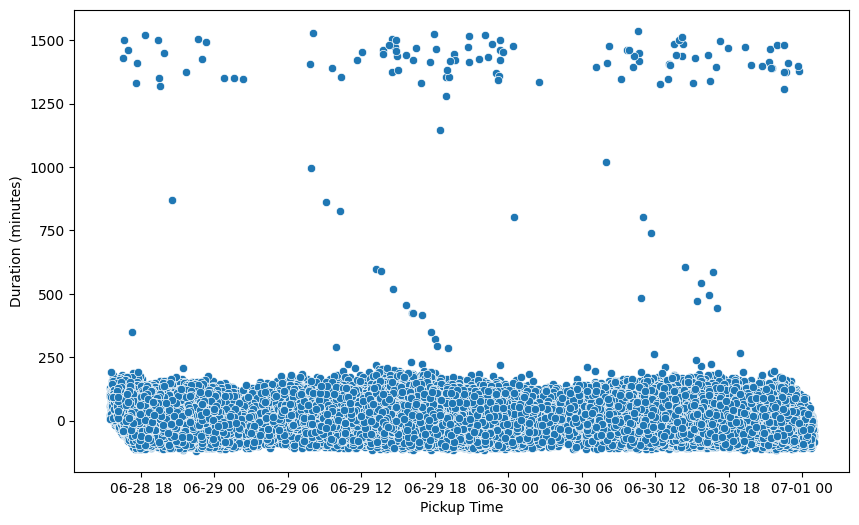

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tpep_pickup_datetime', y='duration', data=data)
plt.xlabel('Pickup Time')
plt.ylabel('Duration (minutes)')
plt.show()

In [13]:
(data['duration'] < 0).sum()

65674

In [19]:
neg_duration = data[data['duration'] < 0]
print(neg_duration[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duration']])

       tpep_pickup_datetime tpep_dropoff_datetime   duration
0       2023-06-28 17:20:21   2023-06-28 16:34:45 -45.600000
1       2023-06-29 23:05:01   2023-06-29 22:01:35 -63.433333
5       2023-06-29 16:31:14   2023-06-29 16:29:06  -2.133333
6       2023-06-30 12:54:57   2023-06-30 11:52:20 -62.616667
9       2023-06-29 11:12:12   2023-06-29 09:39:24 -92.800000
...                     ...                   ...        ...
174983  2023-06-30 21:57:30   2023-06-30 20:55:40 -61.833333
174992  2023-06-29 00:15:57   2023-06-28 23:54:25 -21.533333
174994  2023-06-29 14:08:39   2023-06-29 13:42:20 -26.316667
174995  2023-06-30 22:50:57   2023-06-30 22:22:22 -28.583333
174998  2023-06-29 19:47:17   2023-06-29 19:08:55 -38.366667

[65674 rows x 3 columns]


In [54]:
data['duration'] = data['duration'].abs()
data['duration']

0         45.600000
1         63.433333
2         53.650000
3         56.866667
4         18.833333
            ...    
174995    28.583333
174996    61.400000
174997    70.033333
174998    38.366667
174999    87.983333
Name: duration, Length: 175000, dtype: float64

In [56]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333


In [55]:
data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

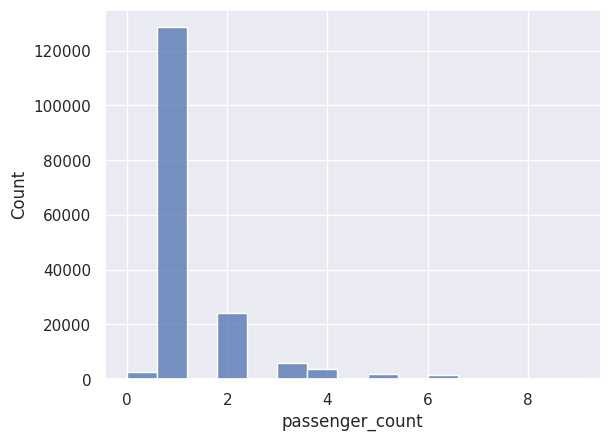

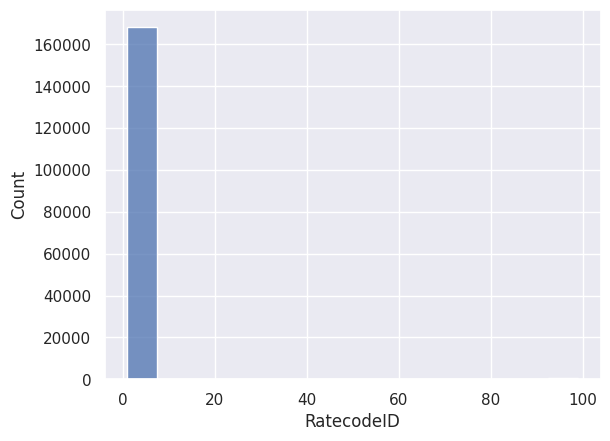

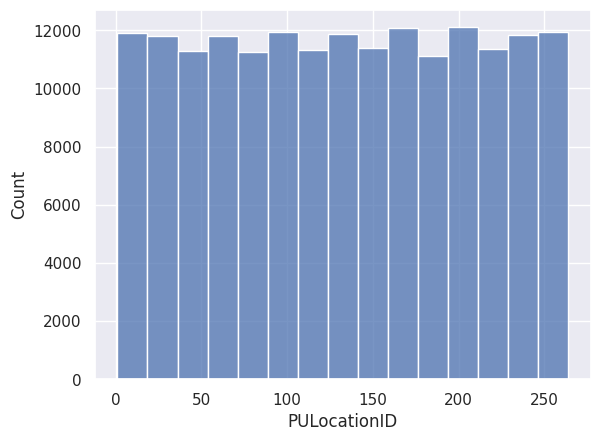

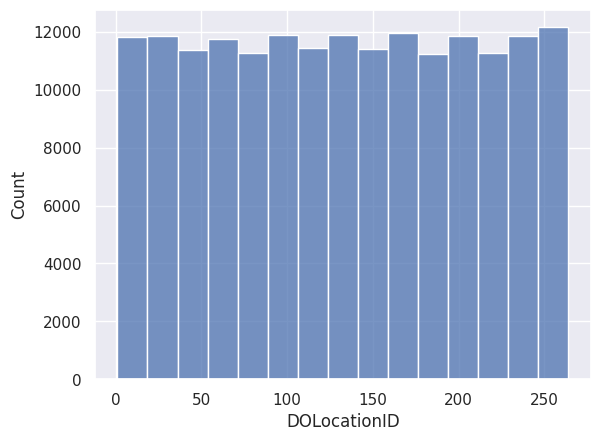

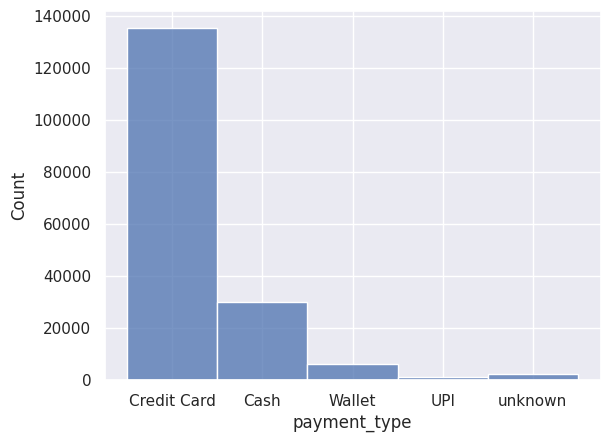

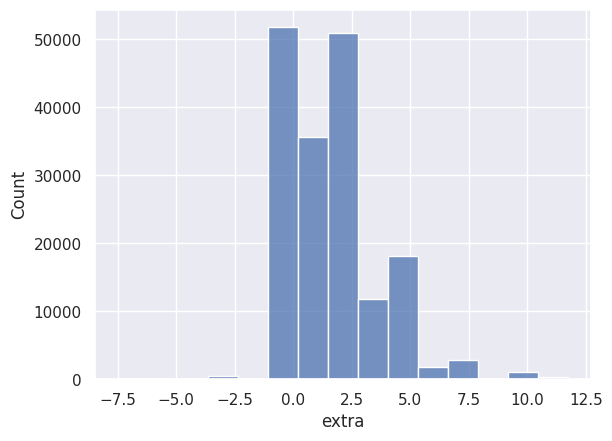

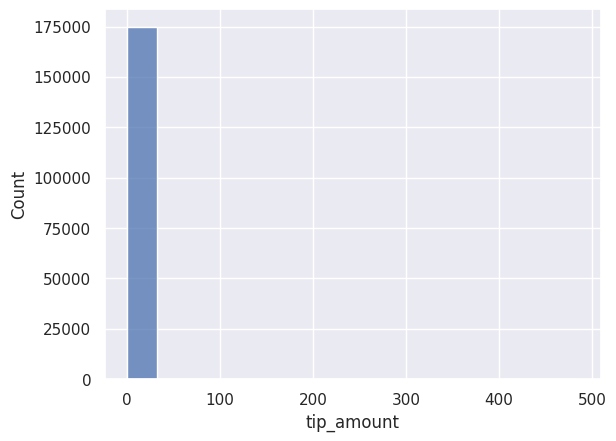

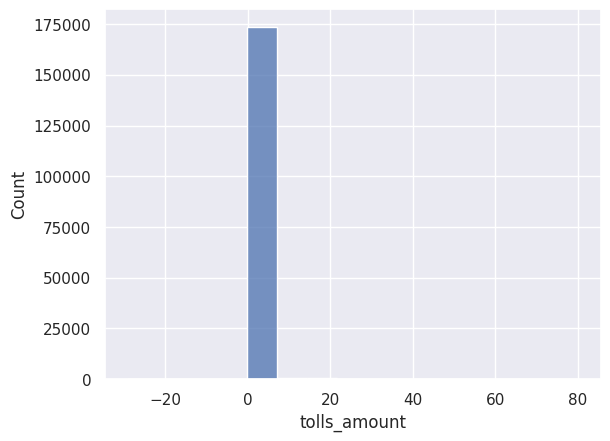

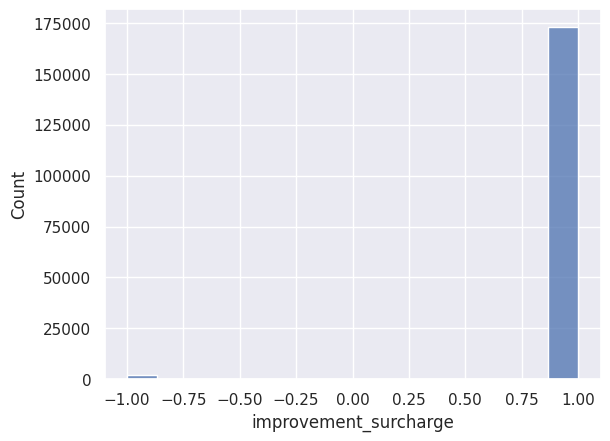

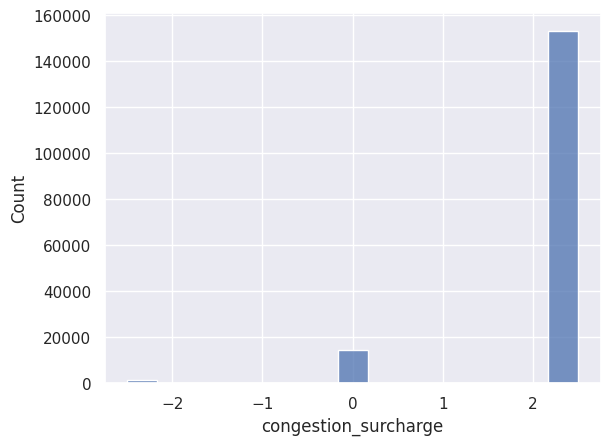

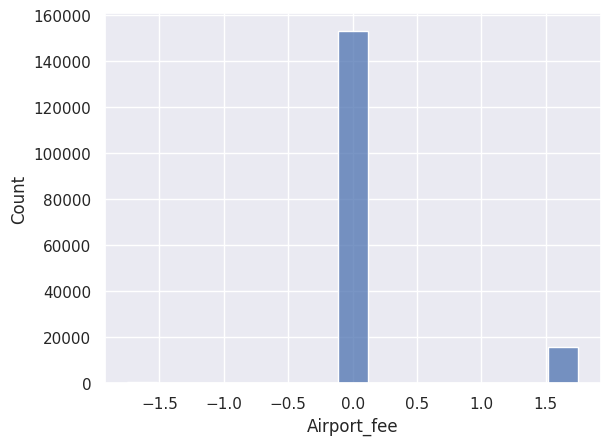

In [7]:
features=['passenger_count','RatecodeID','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount',"improvement_surcharge",'congestion_surcharge','Airport_fee']
for i in features:
    sns.set()
    sns.histplot(data[i], bins=15)
    plt.show()

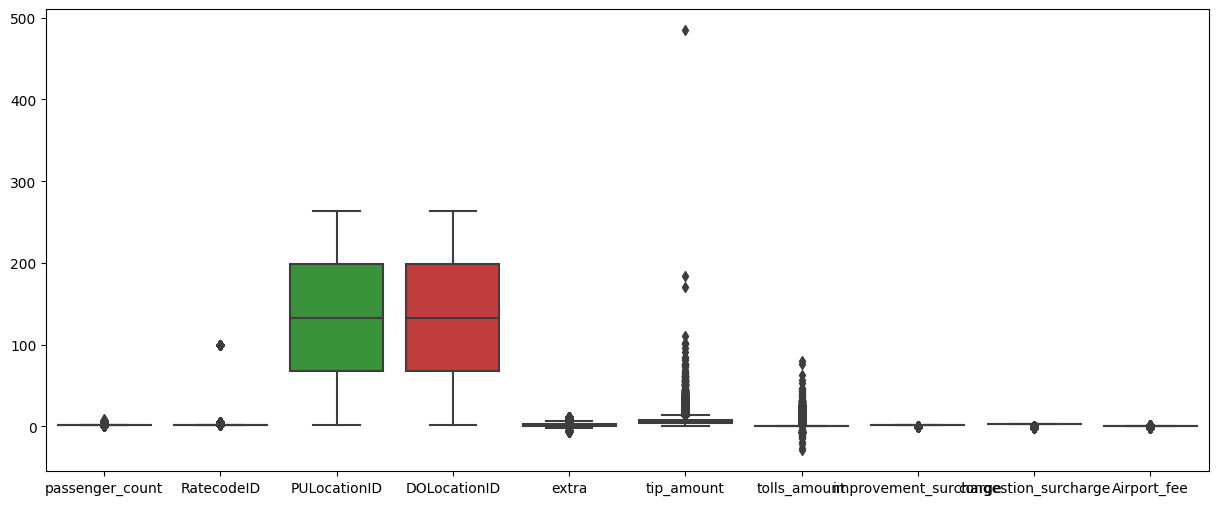

In [22]:
features=['passenger_count','RatecodeID','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount',"improvement_surcharge",'congestion_surcharge','Airport_fee']
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[features])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

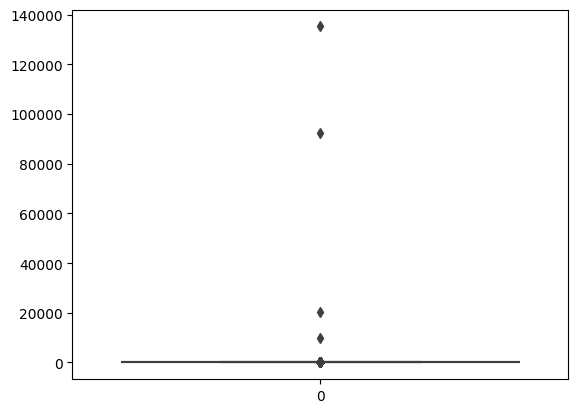

In [28]:
sns.boxplot(data=data["trip_distance"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

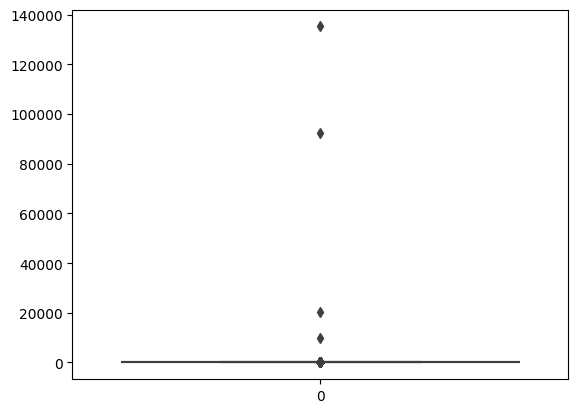

In [27]:
sns.boxplot(data=data["trip_distance"])
plt.show

In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
data.describe()


In [ ]:
# Describe numerical and categorical variables
data.describe(exclude='number')


In [ ]:
data['tpep_pickup_datetime'].value_counts()

In [ ]:
data.head()

In [ ]:
data['VendorID'].value_counts()

In [ ]:
data['payment_type'].value_counts()

In [ ]:
data['store_and_fwd_flag'].value_counts()

In [57]:
exploration_set=data.copy()

### **EDA on Exploration Set**

In [58]:
feature_list=exploration_set.drop('total_amount', axis=1)
print(feature_list)

        VendorID  passenger_count  trip_distance  RatecodeID  \
0              1              1.0           2.14         1.0   
1              0              1.0           2.70         1.0   
2              1              1.0           1.15         1.0   
3              0              1.0           0.40         1.0   
4              1              3.0           1.10         1.0   
...          ...              ...            ...         ...   
174995         1              3.0           3.45         1.0   
174996         1              1.0           9.44         1.0   
174997         0              1.0           2.40         1.0   
174998         1              1.0           4.71         1.0   
174999         1              1.0           1.01         1.0   

       store_and_fwd_flag  PULocationID  DOLocationID payment_type  extra  \
0                       N           120             9  Credit Card    2.5   
1                       N            15           215  Credit Card    3.5   


In [59]:
label=exploration_set['total_amount']
print(label)

0         20.64
1         25.55
2         17.64
3         12.80
4         18.00
          ...  
174995    28.08
174996    59.95
174997    33.50
174998    40.80
174999    16.32
Name: total_amount, Length: 175000, dtype: float64


In [82]:
categorical_data=exploration_set.select_dtypes(exclude='number')
print(categorical_data)

       store_and_fwd_flag payment_type
0                       N  Credit Card
1                       N  Credit Card
2                       N  Credit Card
3                       N  Credit Card
4                       N  Credit Card
...                   ...          ...
174995                  N  Credit Card
174996                  N         Cash
174997                  N  Credit Card
174998                  N  Credit Card
174999                  N  Credit Card

[175000 rows x 2 columns]


In [84]:
numerical_data=exploration_set.select_dtypes(include='number')
print(numerical_data)

        VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0              1              1.0           2.14         1.0           120   
1              0              1.0           2.70         1.0            15   
2              1              1.0           1.15         1.0           167   
3              0              1.0           0.40         1.0           128   
4              1              3.0           1.10         1.0           203   
...          ...              ...            ...         ...           ...   
174995         1              3.0           3.45         1.0           147   
174996         1              1.0           9.44         1.0           154   
174997         0              1.0           2.40         1.0           168   
174998         1              1.0           4.71         1.0           240   
174999         1              1.0           1.01         1.0           153   

        DOLocationID  extra  tip_amount  tolls_amount  improvem

In [ ]:
numerical_data.isna().sum()

In [ ]:
null_list=["passenger_count", "RatecodeID", "congestion_surcharge", "Airport_fee"]
for i in null_list:
    print(numerical_data[i].value_counts())
    print('*'*50)

In [11]:
corr_matrix=exploration_set.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

ValueError: could not convert string to float: '2023-06-28 17:20:21'

<Axes: >

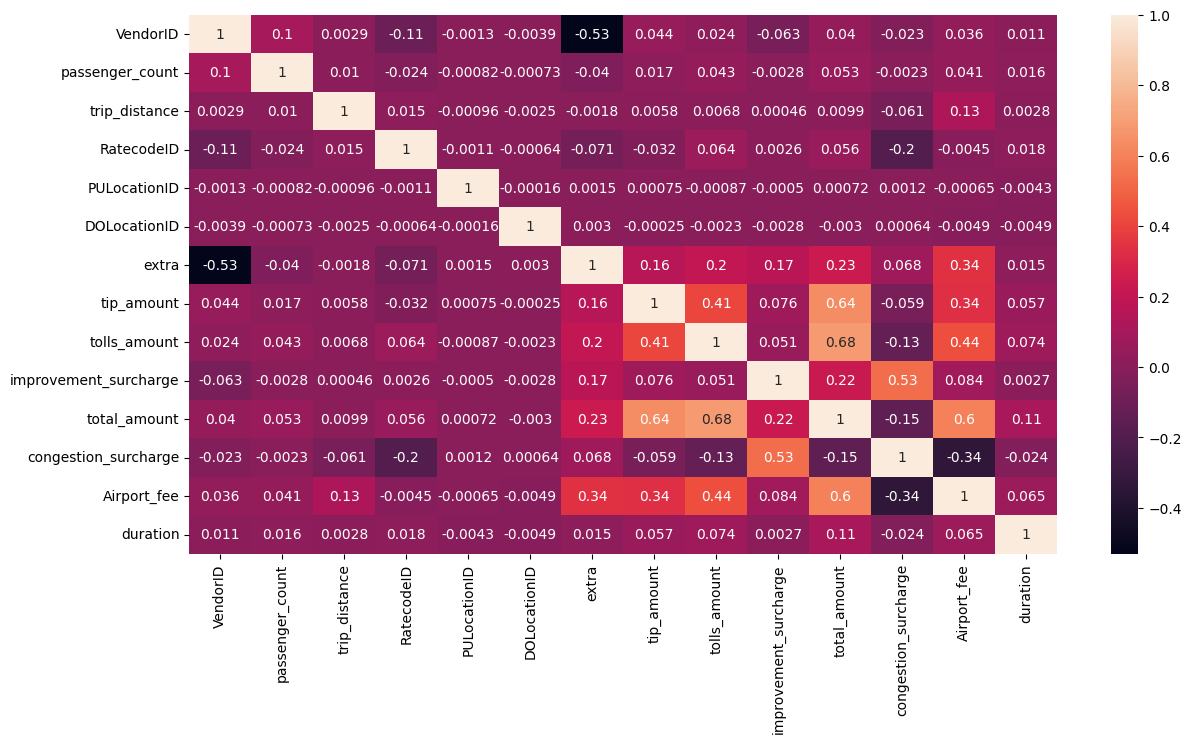

In [26]:
corr_matrix1=numerical_data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix1, annot=True)

In [ ]:
corr_matrix['RatecodeID']

In [27]:
null_list=["passenger_count", "RatecodeID", "congestion_surcharge", "Airport_fee"]
for i in null_list:
    print(corr_matrix[i])
    print('*'*50)

NameError: name 'corr_matrix' is not defined

In [ ]:
exploration_set['store_and_fwd_flag'].value_counts()

In [79]:
for i in categorical_data:
    print(categorical_data[i].value_counts())
    print('*'*50)

tpep_pickup_datetime
2023-06-28 18:11:16    8
2023-06-28 19:27:11    8
2023-06-28 18:42:04    8
2023-06-29 16:29:15    8
2023-06-30 10:10:19    8
                      ..
2023-06-29 22:20:13    1
2023-06-30 09:33:42    1
2023-06-28 19:26:26    1
2023-06-29 05:51:13    1
2023-06-30 21:26:43    1
Name: count, Length: 109877, dtype: int64
**************************************************
tpep_dropoff_datetime
2023-06-29 19:08:22    10
2023-06-28 18:36:02     8
2023-06-29 18:45:50     8
2023-06-29 18:04:14     8
2023-06-29 12:28:20     8
                       ..
2023-06-29 14:52:05     1
2023-06-30 13:57:09     1
2023-06-28 17:13:46     1
2023-06-29 12:28:23     1
2023-06-30 22:54:42     1
Name: count, Length: 109713, dtype: int64
**************************************************
store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64
**************************************************
payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown    

### **Train-Test Splitting in Numerical Data**

In [124]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['total_amount'])
Y = data['total_amount']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.15, random_state=42)
print(len(train_set))
print(len(test_set))

148750
26250


In [ ]:
for i in numerical_data:
    print(numerical_data[i].value_counts())
    print('*'*50)

In [61]:
numerical_data['Airport_fee'].fillna(numerical_data['Airport_fee'].mean(), inplace=True)


In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(numerical_data, numerical_data['Airport_fee']):
    strat_train_set = numerical_data.loc[train_index]
    strat_test_set = numerical_data.loc[test_index]
print(len(strat_train_set))
print(len(strat_test_set))

148750
26250


In [ ]:
train_set.isna().sum()

In [36]:
train_set1=train_set.copy()

### imputing the null entries row

In [ ]:
# train_data=train_set1.dropna()
# test_data=test_set.dropna()
# print(len(train_data))

In [ ]:
train_data.head()

In [63]:
features=strat_train_set.drop('total_amount', axis=1)
label=strat_train_set['total_amount'].copy()
features.shape

(148750, 13)

### Pipeline Formation:

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipeline=Pipeline([('imputer', SimpleImputer(strategy='constant')),('std_scaler', StandardScaler())])

In [65]:
features_tr=pipeline.fit_transform(features)
features_tr.shape

(148750, 13)

### Model Selection

In [144]:
from sklearn.ensemble import RandomForestRegressor as RFR

model=RFR()


In [145]:
from sklearn.linear_model import LinearRegression as LR
model=LR()


In [147]:
from sklearn.tree import DecisionTreeRegressor as DTR
model=DTR()


In [118]:
model.fit(features_tr, label)

RandomForestRegressor()

In [111]:
some_data=features.iloc[:10]
some_labels=label.iloc[:10]
list(some_labels)

[25.9, 17.5, 20.2, 16.0, 22.1, 15.6, 24.8, 76.09, 87.3, 17.8]

In [112]:
prepared_data=pipeline.transform(some_data)
model.predict(prepared_data)

array([  9.8 ,   7.7 ,  11.83,  13.44,  10.9 ,  24.  ,  15.75, 180.  ,
       587.25,  24.3 ])

### Evaluation of Model

In [113]:
from sklearn.metrics import mean_squared_error
predictions=model.predict(features_tr)
mse=mean_squared_error(label, predictions)
np.sqrt(mse)

5.698973799872747e-15

In [114]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, features_tr, label, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [115]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
print_scores(rmse_scores)

Scores: [ 8.46315873  7.24335522  8.60286494  8.15922437  8.26793078 11.40853913
  7.51601235  8.72392338  7.40840547  9.65509241]
Mean:  8.544850678187666
Standard deviation:  1.172380196203675


### Local Test-data Evaluation

In [116]:
X_test=strat_test_set.drop('total_amount', axis=1)
Y_test=strat_test_set['total_amount'].copy()
X_test_prepared = pipeline.transform(X_test)
test_predictions = model.predict(X_test_prepared)
test_mse = mean_squared_error(Y_test, test_predictions)
np.sqrt(test_mse)

117.45482351777802

In [ ]:
df = pd.DataFrame({'ID': range(1, len(test_predictions) + 1), 'total_amount': test_predictions})
df.to_csv('file.csv', index=False)
print(df)

In [ ]:
file=pd.read_csv('file.csv')
file.info()

In [ ]:
from IPython.display import FileLink
FileLink('file.csv')

### Real Test Data Prediction:

In [87]:
test_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
test_data.shape

(50000, 16)

In [89]:
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])
test_data['duration'] = (test_data['tpep_dropoff_datetime'] - test_data['tpep_pickup_datetime']).dt.total_seconds() / 60
test_data['duration'] = test_data['duration'].abs()
test_data['duration']

0         4.000000
1         8.500000
2        66.733333
3        12.450000
4        28.383333
           ...    
49995    48.616667
49996    14.750000
49997    39.116667
49998    26.750000
49999    49.983333
Name: duration, Length: 50000, dtype: float64

In [91]:
test_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
test_data.shape

(50000, 15)

In [92]:
test_data_tr=pipeline.fit_transform(test_data.select_dtypes(exclude='object'))
predicted_data=model.predict(test_data_tr)
predicted_data

array([55.896 , 17.0043, 13.8282, ..., 19.4343, 66.8126, 14.4728])

In [93]:
df = pd.DataFrame({'ID': range(1, len(predicted_data) + 1), 'total_amount': predicted_data})
df.to_csv('submission.csv', index=False)
print(df)
from IPython.display import FileLink
FileLink('submission.csv')

          ID  total_amount
0          1       55.8960
1          2       17.0043
2          3       13.8282
3          4       19.5695
4          5       28.5463
...      ...           ...
49995  49996       16.8739
49996  49997       49.7262
49997  49998       19.4343
49998  49999       66.8126
49999  50000       14.4728

[50000 rows x 2 columns]


In [94]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

In [119]:
file2=pd.read_csv('submission.csv')
file2.shape

(50000, 2)

# Fresh-Start


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv'
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

for train_index, test_index in split.split(data, data['payment_type']):
    X_train, Y_train = data.loc[train_index].drop('total_amount', axis=1), data['total_amount'].loc[train_index]
    X_test, Y_test = data.loc[test_index].drop('total_amount', axis=1), data['total_amount'].loc[test_index]

print(len(X_train))
print(len(X_test))
print(X_train.shape)

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['total_amount'])
Y = data['total_amount']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.15, random_state=42)
print(len(X_train))
print(len(X_test))

148750
26250


In [4]:
from sklearn.dummy import DummyRegressor
dummy_regr=DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, Y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test, Y_test)

-9.854498288941471e-06

In [5]:
features=X_train.copy()
label=Y_train.copy()


In [16]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
# Categorical_features = features.select_dtypes(['object']).columns
# Numerical_features = features.select_dtypes(['int', 'float']).columns
# pipe_categorical = Pipeline(steps = [('impute', SimpleImputer(strategy = 'most_frequent')), ('encode', OneHotEncoder())])
# pipe_numerical = Pipeline([('impute', SimpleImputer(strategy = 'median')), ('Scaling', StandardScaler())])
# CT = ColumnTransformer([('cat', pipe_categorical, Categorical_features), ('Num', pipe_numerical, Numerical_features)], remainder = 'passthrough')
# features_tr = CT.fit_transform(features)

In [ ]:
# from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.preprocessing import OrdinalEncoder
# numeric_features = features.columns.difference(['store_and_fwd_flag', 'payment_type']).tolist()
# categorical_features = ['store_and_fwd_flag', 'payment_type']

# numerical_pipe = ('impute', KNNImputer(n_neighbors=5), numeric_features)
# scale_pipe = Pipeline(steps=[('numeric', numerical_pipe),
#                              ('scale', StandardScaler())])

# categorical_pipe = ('cat', OrdinalEncoder(), categorical_features)
# complete_pipe = FeatureUnion([('numeric', scale_pipe), ('cat', categorical_pipe)])
# pipe = Pipeline(steps=[('cp', complete_pipe)])
# features_tr = pipe.fit_transform(features)

In [6]:
import pandas as pd

features['store_and_fwd_flag'].fillna('Unknown', inplace=True)

distribution = features['store_and_fwd_flag'].value_counts(normalize=True)

features['store_and_fwd_flag'] = features['store_and_fwd_flag'].apply(lambda x: distribution.sample(1, weights=distribution.values).index[0] if x == 'Unknown' else x)
print(features['store_and_fwd_flag'].value_counts())
print(X_train['store_and_fwd_flag'].value_counts())

store_and_fwd_flag
N          147526
Y            1048
Unknown       176
Name: count, dtype: int64
store_and_fwd_flag
N    142593
Y      1007
Name: count, dtype: int64


In [22]:
# features['tpep_pickup_datetime'] = pd.to_datetime(features['tpep_pickup_datetime'])
# features['tpep_dropoff_datetime'] = pd.to_datetime(features['tpep_dropoff_datetime'])
# features['duration'] = (features['tpep_dropoff_datetime'] - features['tpep_pickup_datetime']).dt.total_seconds() / 60
# features['duration']

78908     68.583333
111242    24.200000
5746       9.283333
146873   -16.383333
149547    -3.066667
            ...    
119879    17.216667
103694   -46.833333
131932    25.883333
146867    66.850000
121958    51.333333
Name: duration, Length: 148750, dtype: float64

In [7]:
features.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148750 entries, 78908 to 121958
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               148750 non-null  int64  
 1   passenger_count        143600 non-null  float64
 2   trip_distance          148750 non-null  float64
 3   RatecodeID             143600 non-null  float64
 4   store_and_fwd_flag     148750 non-null  object 
 5   PULocationID           148750 non-null  int64  
 6   DOLocationID           148750 non-null  int64  
 7   payment_type           148750 non-null  object 
 8   extra                  148750 non-null  float64
 9   tip_amount             148750 non-null  float64
 10  tolls_amount           148750 non-null  float64
 11  improvement_surcharge  148750 non-null  float64
 12  congestion_surcharge   143600 non-null  float64
 13  Airport_fee            143600 non-null  float64
dtypes: float64(9), int64(3), object(2)
me

<Axes: >

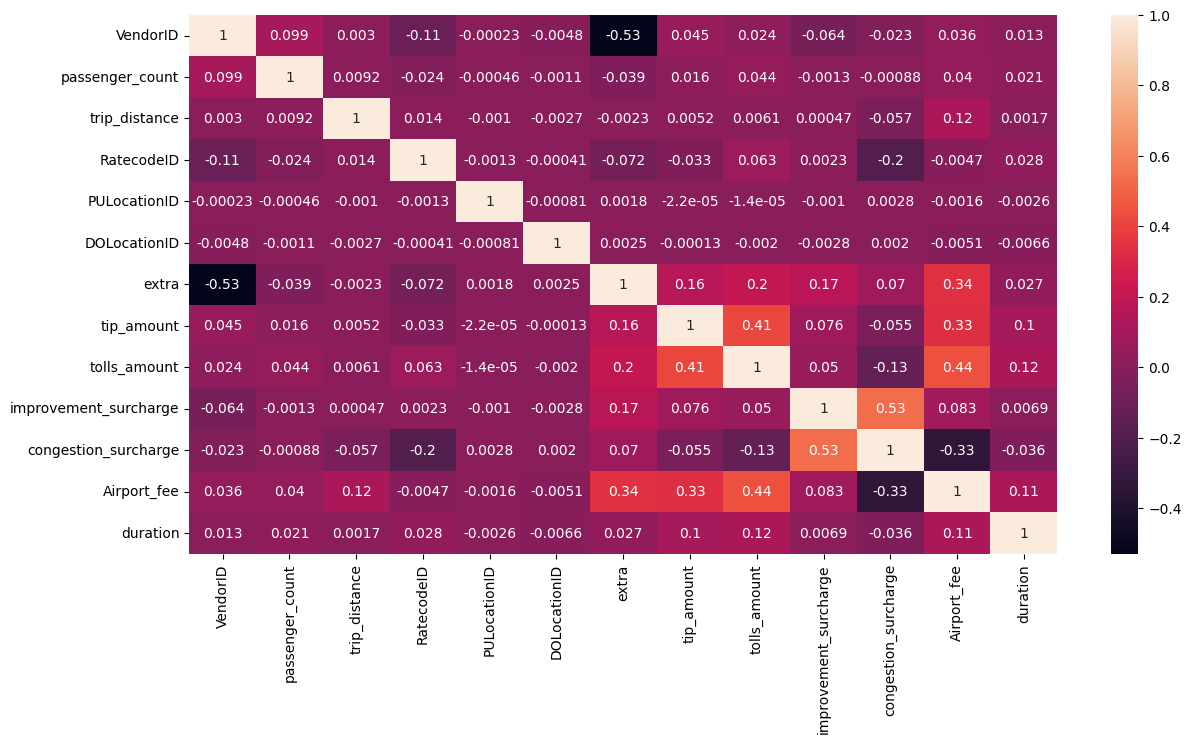

In [10]:
corr_matrix = features.select_dtypes(exclude='object').corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True)


In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

# numeric_features = features.columns.difference(['store_and_fwd_flag', 'payment_type']).tolist()
# categorical_features = ['store_and_fwd_flag','payment_type']
categorical_features = features.select_dtypes(['object']).columns
numeric_features = features.select_dtypes(['int', 'float']).columns
numerical_pipe = ColumnTransformer(transformers=[('impute', SimpleImputer(strategy = 'mean'), numeric_features)])
scale_pipe = Pipeline(steps=[('numeric', numerical_pipe),
                             ('scale', StandardScaler())])

categorical_pipe = ColumnTransformer(transformers = [('cat', OrdinalEncoder(), categorical_features)])
complete_pipe = FeatureUnion([('numeric', scale_pipe), ('cat', categorical_pipe)])
pipe = Pipeline(steps =[('cp',complete_pipe),
                         ('varianceThreshold', VarianceThreshold(threshold =0.15))])
features_tr=pipe.fit_transform(features)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
# model = LinearRegression()
model= HistGradientBoostingRegressor(random_state=42)
# sgdregressor = SGDRegressor(random_state = 1)
# model = GridSearchCV(sgdregressor,
#                         {'loss':['squared_error', 'huber'],
#                           'penalty':['l2','l1'],
#                           'alpha':[0.1,0.01,0.001],
#                           'max_iter':[1000,2000,5000]
#                           } ,
#                         cv = 4, 
#                         return_train_score = True)
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model.fit(features_tr, label)

HistGradientBoostingRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error
Y_pred=model.predict(features_tr)
mse=mean_squared_error(label, Y_pred)
np.sqrt(mse)

5.828990441690123

In [13]:
import sklearn.metrics as skm
skm.r2_score(label, Y_pred)

0.9472531216160915

In [14]:
some_data=X_train.iloc[:10]
some_labels=Y_train.iloc[:10]
print(list(some_labels))
prepared_data=pipe.transform(some_data)
model.predict(prepared_data)

[104.41, 28.2, 18.9, 19.3, 20.6, 17.28, 13.0, 25.68, 18.84, 32.28]


array([103.13775573,  26.86989319,  15.83450562,  19.07870773,
        25.74338961,  20.4922223 ,  15.63187286,  25.92186759,
        18.85178443,  35.94276314])

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, features_tr, label, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
print_scores(rmse_scores)

Scores: [7.49974405 7.21382947 6.06717503 6.27450667 6.55629476 5.43813245
 5.59716447 7.79229033 7.93618787 7.98074544]
Mean:  6.835607054795226
Standard deviation:  0.9215207638715289


In [31]:
# X_test['tpep_pickup_datetime'] = pd.to_datetime(X_test['tpep_pickup_datetime'])
# X_test['tpep_dropoff_datetime'] = pd.to_datetime(X_test['tpep_dropoff_datetime'])
# X_test['duration'] = (X_test['tpep_dropoff_datetime'] - X_test['tpep_pickup_datetime']).dt.total_seconds() / 60
# # X_test['duration'] = X_test['duration'].abs()
# X_test['duration']

148789    50.433333
169618    -8.400000
131258   -27.516667
31864     -2.050000
11032    -67.783333
            ...    
37629    -15.400000
78977     98.233333
132007   -26.466667
122424     4.166667
106958    31.966667
Name: duration, Length: 26250, dtype: float64

In [16]:
X_test['store_and_fwd_flag'].fillna('Unknown', inplace=True)

# Determine the current distribution of 'Y' and 'N'
distribution = X_test['store_and_fwd_flag'].value_counts(normalize=True)

# Replace NaN values based on the current distribution
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].apply(lambda x: distribution.sample(1, weights=distribution.values).index[0] if x == 'Unknown' else x)
X_test_prepared = pipe.transform(X_test)
predicted = model.predict(X_test_prepared)
test_mse = mean_squared_error(Y_test, predicted)
np.sqrt(test_mse)

6.402416271580423

In [17]:
import sklearn.metrics as skm
skm.r2_score(Y_test, predicted)

0.9378331246129056

# Real test-data Prediction

In [ ]:
test=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
test.shape

In [22]:
# test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])
# test['tpep_dropoff_datetime'] = pd.to_datetime(test['tpep_dropoff_datetime'])
# test['duration'] = (test['tpep_dropoff_datetime'] - test['tpep_pickup_datetime']).dt.total_seconds() / 60
# # test['duration'] = test['duration'].abs()
# test['duration']

0         4.000000
1         8.500000
2        66.733333
3        12.450000
4        28.383333
           ...    
49995    48.616667
49996   -14.750000
49997   -39.116667
49998   -26.750000
49999   -49.983333
Name: duration, Length: 50000, dtype: float64

In [19]:
test.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
test.shape

(50000, 14)

In [20]:
test['store_and_fwd_flag'].fillna('Unknown', inplace=True)

# Determine the current distribution of 'Y' and 'N'
distribution = test['store_and_fwd_flag'].value_counts(normalize=True)

# Replace NaN values based on the current distribution
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].apply(lambda x: distribution.sample(1, weights=distribution.values).index[0] if x == 'Unknown' else x)
X_test_prepared = pipe.transform(test)
predicted_data=model.predict(X_test_prepared)


In [25]:
df = pd.DataFrame({'ID': range(1, len(predicted_data) + 1), 'total_amount': predicted_data})
df.to_csv('submission.csv', index=False)
print(df)
from IPython.display import FileLink
FileLink('submission.csv')

          ID  total_amount
0          1       36.9455
1          2       26.6520
2          3       16.7850
3          4       15.1158
4          5       24.3949
...      ...           ...
49995  49996       15.6529
49996  49997       28.2804
49997  49998       20.8732
49998  49999       37.1589
49999  50000       17.8756

[50000 rows x 2 columns]


/kaggle/working/submission.csv